<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML-F1/blob/master/MNIST/Exercices/Exercice2%20-%20FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

# Chargement des données Fashion-MNIST

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_entrainement, y_entrainement), (x_test, y_test) = fashion_mnist.load_data()
orig_test = x_test

# Affichage de quelques images

Labels utilisés :
* 0 : T-shirt / Top
* 1 : Pantalon
* 2 : Pullover
* 3 : Robe
* 4 : Manteau
* 5 : Sandales
* 6 : Shirt
* 7 : Baskets
* 8 : Sac
* 9 : Bottines

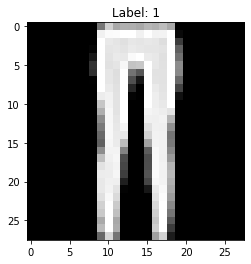

In [25]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

# Préparation des données

In [28]:
if K.image_data_format() == 'channels_first':
    x_entrainement = x_entrainement.reshape(x_entrainement.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, dim_img_lignes, dim_img_colonnes)
    input_shape = (1, dim_img_lignes, dim_img_colonnes)
else:
    x_entrainement = x_entrainement.reshape(x_entrainement.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
x_entrainement, x_test = x_entrainement / 255.0, x_test / 255.0

print(x_entrainement.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Définition d'un réseau de neurones à convolution

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

# Entrainement du modèle

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6663 - accuracy: 0.7659 - val_loss: 0.3812 - val_accuracy: 0.8632
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4485 - accuracy: 0.8429 - val_loss: 0.3195 - val_accuracy: 0.8851
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3902 - accuracy: 0.8616 - val_loss: 0.2874 - val_accuracy: 0.8939
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3551 - accuracy: 0.8735 - val_loss: 0.2776 - val_accuracy: 0.8985
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3294 - accuracy: 0.8815 - val_loss: 0.2668 - val_accuracy: 0.9029
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3094 - accuracy: 0.8894 - val_loss: 0.2512 - val_accuracy: 0.9070
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2924 - accuracy: 0.8943 - val_loss: 0.2460 - val_accuracy: 0.9097
Epoch 

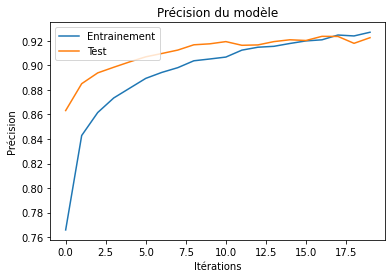

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Entraine le modèle sur un certain nombre d'itérations
historique = model.fit(x_entrainement, y_entrainement, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

# Evalue la précision du modèle avec les données de tests
score = model.evaluate(x_test, y_test, verbose=0)
print('Pertes (Test) :', score[0])
print('Précision (Test) :', score[1])

# Affiche les informations
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

# Prédictions

In [ ]:
predictions = model.predict(x_test)
plus_probable = predictions.argmax(1)
plus_probable

array([9, 2, 1, ..., 8, 1, 5])

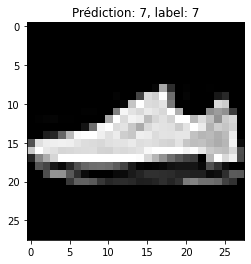

In [45]:
index = random.randrange(10000)
plt.title('Prédiction: %d, label: %d' % (plus_probable[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()